## Loading libraries and Dataset

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv("C:\\Bootcamp\\Labpessoal\\Proj_Predictive_Maintenance_Dataset\\predictive_maintenance_dataset.csv")  

## Exploratory data analysis

In [22]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494,124494,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
unique,304,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/1/2015,S1F0E9EP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1163,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,NaN,NaN,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000


In [23]:
df["device"].nunique()

1169

In [24]:
124494 / 1169

106.4961505560308

In [25]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [26]:
df.dtypes


date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

In [27]:
df.shape

(124494, 12)

In [28]:
df.duplicated().sum()

np.int64(1)

In [29]:
df.index.is_unique

True

## Data Engeneering

In [30]:
df["date"] = pd.to_datetime(df["date"])

In [31]:
df.dtypes

date       datetime64[ns]
device             object
failure             int64
metric1             int64
metric2             int64
metric3             int64
metric4             int64
metric5             int64
metric6             int64
metric7             int64
metric8             int64
metric9             int64
dtype: object

Class balance in "failure"

In [32]:
df["failure"].value_counts(normalize=True)

failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64

In [33]:
df = df.sort_values("date")

 Correlation with "failure"

In [34]:
df.corr(numeric_only=True)["failure"].sort_values(ascending=False)

failure    1.000000
metric8    0.119055
metric7    0.119055
metric4    0.067398
metric2    0.052901
metric5    0.002270
metric1    0.001983
metric9    0.001067
metric6   -0.000550
metric3   -0.000948
Name: failure, dtype: float64

In [35]:
df.describe()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,2015-04-16 05:20:49.737337088,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
min,2015-01-01 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,2015-02-09 00:00:00,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,2015-03-27 00:00:00,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,2015-06-17 00:00:00,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2015-11-02 00:00:00,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000
std,NaN,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220


In [36]:
df.head(20)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
779,2015-01-01,W1F0Y13C,0,234318640,0,0,0,4,185772,0,0,3
778,2015-01-01,W1F0XKWR,0,89660704,0,0,0,7,30,0,0,0
777,2015-01-01,W1F0X7QX,0,162013456,0,0,0,12,217686,0,0,0
776,2015-01-01,W1F0X7PR,0,13138392,0,0,0,9,191343,0,0,0
775,2015-01-01,W1F0X7P2,0,33224832,0,0,0,13,216960,0,0,0
774,2015-01-01,W1F0X711,0,18538632,0,0,0,15,217590,0,0,0
780,2015-01-01,W1F0Y2PY,0,132033080,0,0,0,5,182050,0,0,0
773,2015-01-01,W1F0X70N,0,165583552,0,0,0,13,186288,0,0,0
771,2015-01-01,W1F0X6V0,0,175031320,0,0,0,11,213515,0,0,0


 Feature vs target behavior

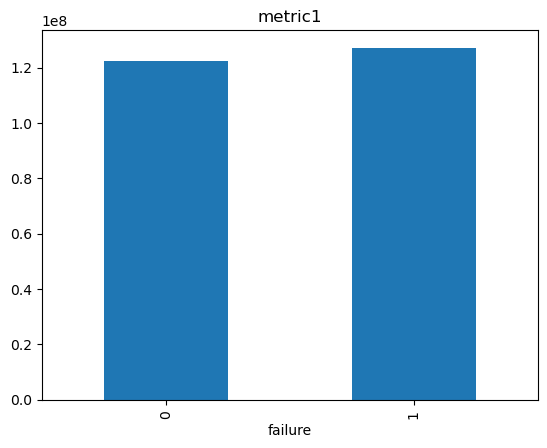

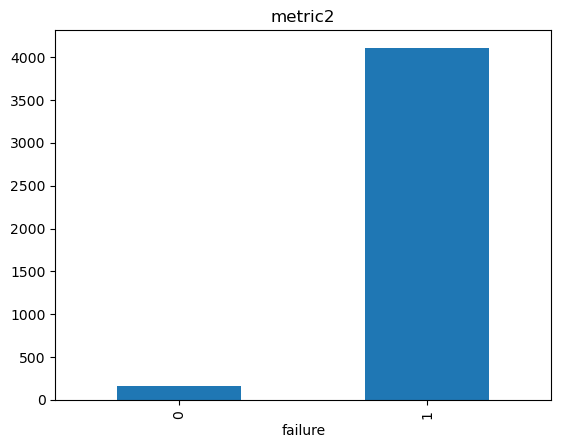

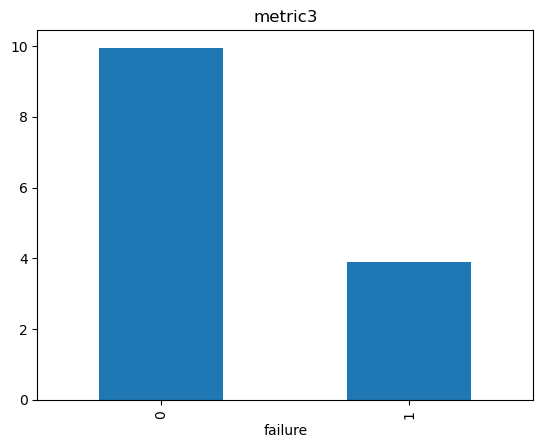

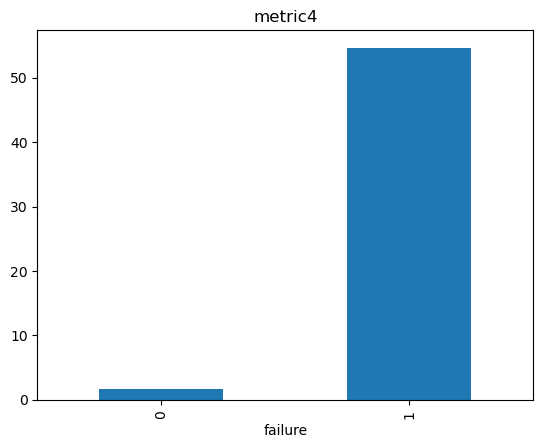

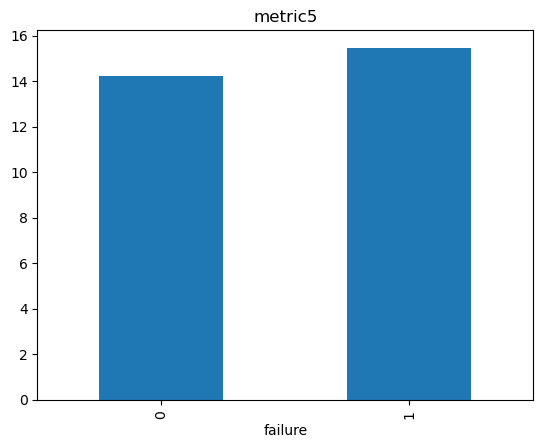

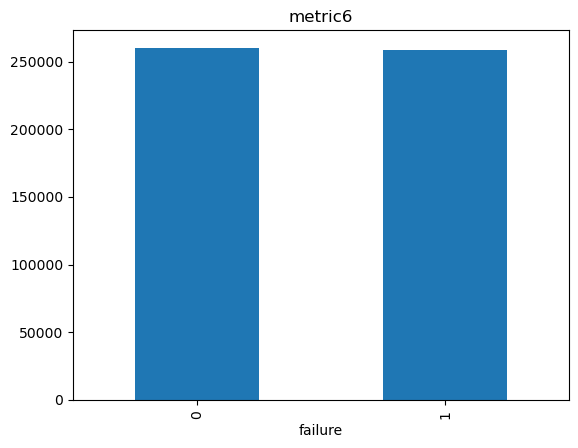

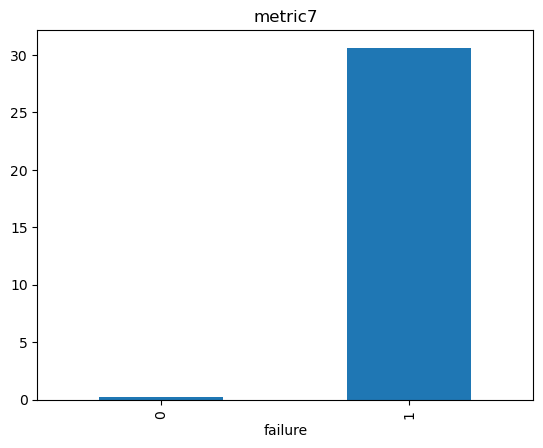

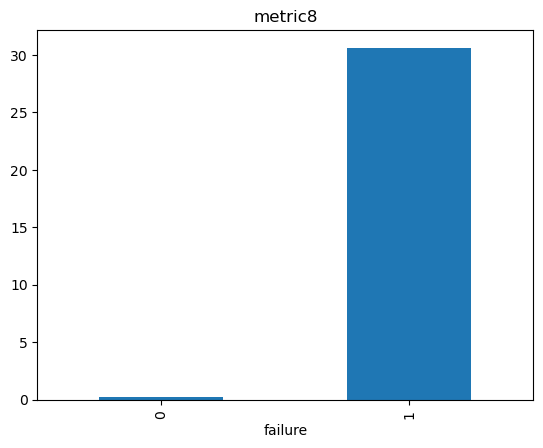

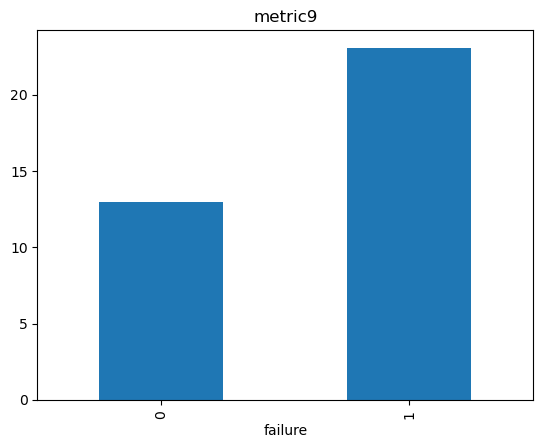

In [37]:
for col in df.select_dtypes("number").columns:
    if col != "failure":
        df.groupby("failure")[col].mean().plot(kind="bar", title=col)
        plt.show()


Correlation map

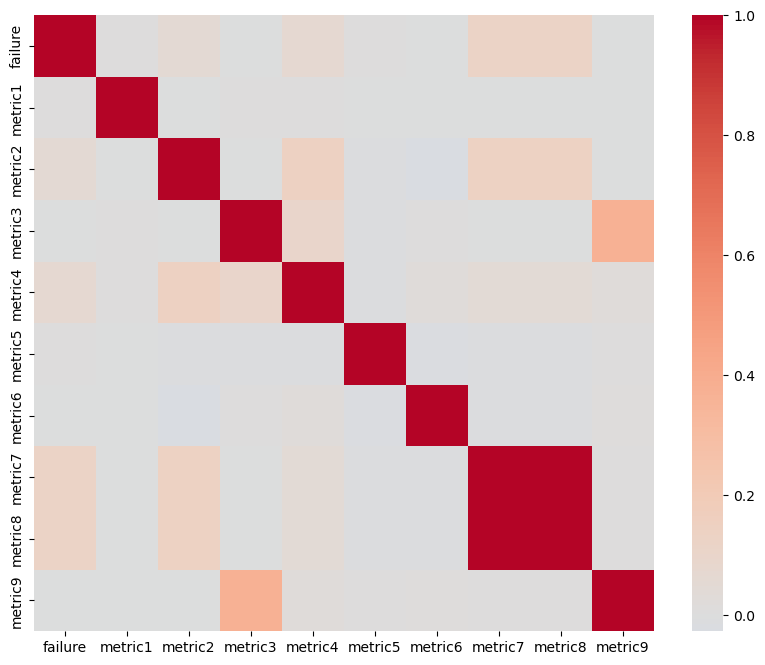

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.show()

Failure has no strong linear correlation
Failure is likely multivariate
Metric 7 and 8 are highly correlated, maybe they are measuring the same phenomenon, or one is redundant

Decided that i need to predict when the device is 'dying' i will, turn static rows into temporal rows, and predict distance to failure

In [39]:
df = df.sort_values(["device", "date"])

df["time_to_failure"] = (
    df.groupby("device")["failure"]
      .transform(lambda x: x[::-1].cumsum()[::-1])
)

## Model Creation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

Define the target feature

In [41]:
target = "failure"

X = df.drop(columns=[target])
y = df[target]

In [44]:
window = 10

numeric_cols = (
    df.select_dtypes(include="number")
      .columns
      .drop("failure", errors="ignore")
)

for col in numeric_cols:
    df[f"{col}_mean"] = (
        df.groupby("device")[col]
          .rolling(window, min_periods=1)
          .mean()
          .reset_index(level=0, drop=True)
    )

    df[f"{col}_std"] = (
        df.groupby("device")[col]
          .rolling(window, min_periods=1)
          .std()
          .reset_index(level=0, drop=True)
    )

Normalization

In [46]:
df[numeric_cols] = (
    df.groupby("device")[numeric_cols]
      .transform(lambda x: (x - x.mean()) / x.std())
)

chosing only numerical values

In [47]:
X = X.select_dtypes(include=["int64", "float64"])

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [50]:
model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42, subsample=0.8)

In [51]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       0.17      0.05      0.07        21

    accuracy                           1.00     24899
   macro avg       0.58      0.52      0.54     24899
weighted avg       1.00      1.00      1.00     24899

ROC AUC: 0.9348812682079022


Feature importance

In [52]:


feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

metric4            0.557875
metric7            0.177625
metric8            0.163559
metric2            0.036754
metric1            0.031503
metric6            0.012600
metric9            0.006128
metric5            0.005575
metric3            0.004297
time_to_failure    0.004084
dtype: float64